In [237]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns

In [238]:
df = pd.read_csv('C:\\Users\\TOPTAS\\Desktop\\Life_Expectancy_DATA.csv') #Read csv file using pandas library

In [239]:
df.shape #We see how many columns and how many rows our data has

(2938, 22)

In [240]:
df.head() #First 5 rows of the data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [241]:
df.describe().round(2) #Statistics of our data. Rounded to 2 decimal points for a better view

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.00,2928.00,2928.00,2938.00,2744.00,2938.00,2385.00,2938.00,2904.00,2938.00,2919.00,2712.00,2919.00,2938.00,2490.00,2.286000e+03,2904.00,2904.00,2771.00,2775.00
mean,2007.52,69.22,164.80,30.30,4.60,738.25,80.94,2419.59,38.32,42.04,82.55,5.94,82.32,1.74,7483.16,1.275338e+07,4.84,4.87,0.63,11.99
std,4.61,9.52,124.29,117.93,4.05,1987.91,25.07,11467.27,20.04,160.45,23.43,2.50,23.72,5.08,14270.17,6.101210e+07,4.42,4.51,0.21,3.36
min,2000.00,36.30,1.00,0.00,0.01,0.00,1.00,0.00,1.00,0.00,3.00,0.37,2.00,0.10,1.68,3.400000e+01,0.10,0.10,0.00,0.00
25%,2004.00,63.10,74.00,0.00,0.88,4.69,77.00,0.00,19.30,0.00,78.00,4.26,78.00,0.10,463.94,1.957932e+05,1.60,1.50,0.49,10.10
50%,2008.00,72.10,144.00,3.00,3.76,64.91,92.00,17.00,43.50,4.00,93.00,5.76,93.00,0.10,1766.95,1.386542e+06,3.30,3.30,0.68,12.30
75%,2012.00,75.70,228.00,22.00,7.70,441.53,97.00,360.25,56.20,28.00,97.00,7.49,97.00,0.80,5910.81,7.420359e+06,7.20,7.20,0.78,14.30
max,2015.00,89.00,723.00,1800.00,17.87,19479.91,99.00,212183.00,87.30,2500.00,99.00,17.60,99.00,50.60,119172.74,1.293859e+09,27.70,28.60,0.95,20.70


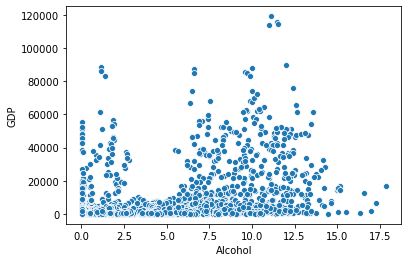

In [242]:
#Draw a scatter plot using scatterplot from seaborn library. This graph shows the relation between alcohol usage and GDPs of the country and as we can see alcohol rates are decreasing while GDP increases 
sns.scatterplot(x=df['Alcohol'],y=df['GDP'])

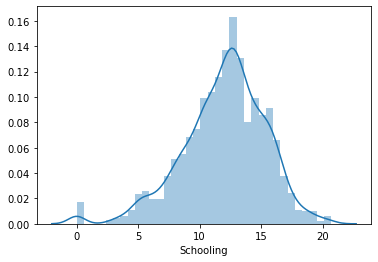

In [243]:
#Using distplot from seaborn library to see what is schooling age for all countries in general. And as we can see, common schooling age is around 12 years old. 
sns.distplot(df['Schooling']) 

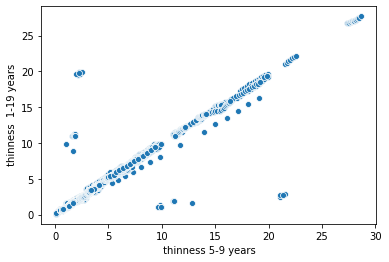

In [244]:
#Graph of thinness between 5-9 years and between 1-19 years young people. We can see both are proportional and also we can see the significant regression
sns.scatterplot(x=df[' thinness 5-9 years'],y=df[' thinness  1-19 years'])

In [245]:
#I want to handle with missing values so I am going to take calculate the number and percentage of missing values
def missing_values(df):
    missing=pd.DataFrame(df.isnull().sum()/len(df))*100 #Formula for finding the percentage
    missing.columns = ['missing_values(%)']
    missing['Missing Values as quantity'] = pd.DataFrame(df.isnull().sum()) #For finding quantity
    return missing.sort_values(by='missing_values(%)', ascending=False)
missing_values(df) #Print missing value statistics

,missing_values(%),Missing Values as quantity
Population,22.191967,652
Hepatitis B,18.822328,553
GDP,15.248468,448
Total expenditure,7.692308,226
Alcohol,6.603131,194
Income composition of resources,5.684139,167
Schooling,5.547992,163
thinness 5-9 years,1.157250,34
thinness 1-19 years,1.157250,34
BMI,1.157250,34


In [246]:
#I should delete missing values or filling them with some numbers. I prefer filling them with the median of my dataframe so there won't be a huge difference
for label,content in df.items():
    if pd.isnull(content).sum():
        df[label] = content.fillna(content.median())

In [247]:
#I started to have errors while giving data names so I want to rename them.
df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [248]:
#We will work on life expectancy value
X = df.drop('Life_Expectancy', axis=1)
y = df['Life_Expectancy']

In [249]:
#Let's see our training and testing model shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2350, 19), (588, 19), (2350,), (588,))

In [250]:
#It is time to see our score according to the models we trained. Firstly I am going to use Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
print('R2 score is : {:.2f}'.format(r2_score(y_test, gbr_pred)))

R2 score is : 0.95


In [251]:
#We had a good rate! Also let's try with a common regressor which is Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)

In [252]:
print('R2 score is : {:.2f}'.format(r2_score(y_test, rf_pred)))

R2 score is : 0.97
